<a href="https://colab.research.google.com/github/Bhoomikannappa/Codealpha_project/blob/main/2nd_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.YRIIJ1_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.YRIIJ1_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 28
BATCH_SIZE = 128

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    image = tf.expand_dims(image, axis=-1)      # (28,28,1)
    return image, label

train_data = (
    ds_train
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1024)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_data = (
    ds_test
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)


In [ ]:
model = tf.keras.Sequential([
    # Feature Extraction Block 1
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Feature Extraction Block 2
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Feature Extraction Block 3
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # Classification Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(ds_info.features['label'].num_classes,
                          activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │        12,079 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,759 (4.58 MB)

 Trainable params: 399,919 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 799,840 (3.05 MB)

In [ ]:
EPOCHS = 5

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)


Epoch 1/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 126s 141ms/step - accuracy: 0.5378 - loss: 1.6440 - val_accuracy: 0.8426 - val_loss: 0.4614
Epoch 2/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 119s 135ms/step - accuracy: 0.8276 - loss: 0.5158 - val_accuracy: 0.8676 - val_loss: 0.3812
Epoch 3/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 125s 142ms/step - accuracy: 0.8499 - loss: 0.4342 - val_accuracy: 0.8739 - val_loss: 0.3596
Epoch 4/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 122s 138ms/step - accuracy: 0.8620 - loss: 0.3904 - val_accuracy: 0.8768 - val_loss: 0.3498
Epoch 5/5
882/882 ━━━━━━━━━━━━━━━━━━━━ 141s 137ms/step - accuracy: 0.8699 - loss: 0.3638 - val_accuracy: 0.8802 - val_loss: 0.3389


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")


147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8847 - loss: 0.3282
Test Accuracy: 0.8802


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


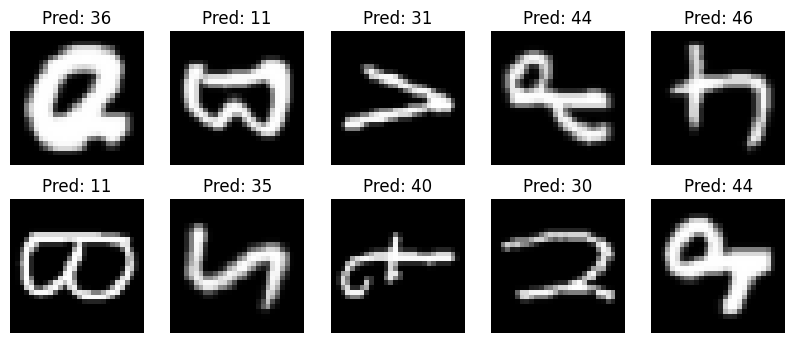

In [ ]:
for images, labels in test_data.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(10,4))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Pred: {predicted_classes[i].numpy()}")
        plt.axis('off')
    plt.show()
